In [1]:
import numpy as np
import pandas as pd
import yahoo_fin.stock_info as si
import get_all_tickers.get_tickers as gt
import yfinance as yf
import json

In [2]:
price_data = pd.read_csv("../relevant_price_data_2019-2020.csv", index_col=0)
fundamental_data = pd.read_csv("../relevant_fundamentals.csv", index_col=0)

C:\Users\Leonhard\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Add new columns : BE/ME and OP

In [3]:
missing_values = fundamental_data[(fundamental_data.mar_cap == 0)] # missing values
missing_values["beme"] = np.nan # replaced with NaN
d = fundamental_data.drop(missing_values.index) # dropped so that I can calculate the BEME
d["beme"] = d["at"]/d["mar_cap"]
fundamental_data = d.append(missing_values)
fundamental_data.reset_index(drop=True, inplace = True)
fundamental_data

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,at,ebit,mar_cap,beme
0,DDD,7.072820e+08,-7.446000e+06,8.801668e+08,0.803577
1,MMM,4.539000e+10,1.928000e+09,9.886729e+10,0.459100
2,WBAI,5.690690e+08,-5.233700e+07,1.281445e+08,4.440839
3,EGHT,6.872440e+08,-3.309800e+07,2.008404e+09,0.342184
4,AHC,1.292670e+08,-1.194000e+06,2.841195e+07,4.549741
...,...,...,...,...,...
5274,SOHON,4.662090e+08,-7.272725e+06,0.000000e+00,NaN
5275,SOHOO,4.662090e+08,-7.272725e+06,0.000000e+00,NaN
5276,SPKEP,3.611280e+08,2.915400e+07,0.000000e+00,NaN
5277,WHLRD,4.743380e+08,4.849000e+06,0.000000e+00,NaN


In [4]:
missing_values = fundamental_data[(fundamental_data.ebit == 0)] # missing values
missing_values["op"] = np.nan # replaced with NaN
d = fundamental_data.drop(missing_values.index) # dropped so that I can calculate the BEME
d["op"] = d["ebit"]/d["at"]
fundamental_data = d.append(missing_values)
fundamental_data.reset_index(drop=True, inplace = True)
fundamental_data

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ticker,at,ebit,mar_cap,beme,op
0,DDD,7.072820e+08,-7.446000e+06,8.801668e+08,0.803577,-0.010528
1,MMM,4.539000e+10,1.928000e+09,9.886729e+10,0.459100,0.042476
2,WBAI,5.690690e+08,-5.233700e+07,1.281445e+08,4.440839,-0.091970
3,EGHT,6.872440e+08,-3.309800e+07,2.008404e+09,0.342184,-0.048160
4,AHC,1.292670e+08,-1.194000e+06,2.841195e+07,4.549741,-0.009237
...,...,...,...,...,...,...
5274,EVBN,2.056993e+09,0.000000e+00,1.393415e+08,14.762238,NaN
5275,IMH,2.469308e+09,0.000000e+00,3.163255e+07,78.062246,NaN
5276,PRK,9.240006e+09,0.000000e+00,1.673021e+09,5.522946,NaN
5277,SACH,1.696320e+08,0.000000e+00,9.093293e+07,1.865463,NaN


### Momentum

#### keep the stocks that we have in trading 212

In [5]:
with open("../relevant_trading_212_tickers.json", "r") as f:
    trading_212_tickers = json.load(f)
    


In [6]:
start = "2019-04-23"
today = "2020-04-27"

In [7]:
date_data = price_data[(price_data.date == start) & (price_data.ticker.isin(trading_212_tickers))]
today_data = price_data[(price_data.date == today) & (price_data.ticker.isin(trading_212_tickers))]

In [8]:
momentum_list = []
mom_ticker_list = []
for ticker in date_data.ticker:
    try:
        date_price = date_data[date_data.ticker == ticker][:1]["adjclose"].item()
        today_price = today_data[today_data.ticker == ticker][:1]["adjclose"].item()
        momentum = today_price - date_price
        momentum_list.append(momentum)
        mom_ticker_list.append(ticker)
    except:
        pass

In [9]:
df = pd.DataFrame({
    "ticker" : mom_ticker_list,
    "momentum" : momentum_list
})

df = df.sort_values(by = "momentum", ascending = False)
df.reset_index(drop = True, inplace = True)
momentum_stocks = df[:30]["ticker"].to_list()

In [10]:
value_stocks_df = fundamental_data.sort_values(by = "beme", ascending = False)
profit_stocks_df = fundamental_data.sort_values(by = "op", ascending = False)

In [11]:
value_stocks_df = value_stocks_df[value_stocks_df.ticker.isin(trading_212_tickers)]
value_stocks_df.reset_index(drop = True, inplace = True)
profit_stocks_df = profit_stocks_df[profit_stocks_df.ticker.isin(trading_212_tickers)]
profit_stocks_df.reset_index(drop = True, inplace = True)

In [12]:
value_stocks = value_stocks_df[:15]["ticker"].to_list()

In [13]:
profit_stocks = profit_stocks_df[:15]["ticker"].to_list()

In [14]:
print(momentum_stocks, value_stocks, profit_stocks)

['CABO', 'AMZN', 'SHOP', 'EQIX', 'DXCM', 'REGN', 'CMG', 'MKTX', 'SAM', 'CHTR', 'BIO', 'TDOC', 'CHE', 'HUM', 'CSGP', 'RNG', 'PODD', 'SBAC', 'MSCI', 'NVDA', 'TSLA', 'TYL', 'GLPG', 'ZM', 'DPZ', 'VRTX', 'ASML', 'MELI', 'RETA', 'MASI'] ['AVAL', 'WF', 'SHG', 'CIB', 'KB', 'ITCB', 'TLK', 'KT', 'BSAC', 'MFG', 'EC', 'MUFG', 'SMFG', 'PKX', 'BCH'] ['BPMC', 'SINO', 'WINA', 'VYGR', 'FLGT', 'UI', 'QDEL', 'SIGA', 'CODX', 'SGEN', 'MED', 'GBL', 'APT', 'BWMX', 'RVP']


In [15]:
import pandas as pd
import random
import yahoo_fin.stock_info as si
import yfinance as yf
import json
import csv
import re
from io import StringIO
from bs4 import BeautifulSoup as bs
import requests
import get_all_tickers.get_tickers as gt
from lxml import html
import matplotlib.pyplot as plt
import json

## Scrape Sector and Country to diversify

Create Dataframes

In [16]:
# get a list of all countries

with open("../countries.json", "r") as f:
    countries = json.load(f)

1. Value Stocks

In [17]:
name_list = []

for ticker in value_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = bs(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in value_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        r = requests.get(url.format(ticker, ticker))
        soup = bs(r.content)
        info = soup.find_all("p", attrs = {"class", "D(ib) W(47.727%) Pend(40px)"})
        for c in countries:
            if c in info[0].text:
                country_list.append(c)
                break
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in value_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = bs(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

value_df = pd.DataFrame({
    "ticker" : value_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

2. Momentum Stocks

In [18]:
name_list = []

for ticker in momentum_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = bs(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in momentum_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        r = requests.get(url.format(ticker, ticker))
        soup = bs(r.content)
        info = soup.find_all("p", attrs = {"class", "D(ib) W(47.727%) Pend(40px)"})
        info[0].text
        for c in countries:
            if c in info[0].text:
                country_list.append(c)
                break
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in momentum_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = bs(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

momentum_df = pd.DataFrame({
    "ticker" : momentum_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

3. Profit Stocks

In [19]:
name_list = []

for ticker in profit_stocks:
    try:
        url_shares_outstanding = "https://finance.yahoo.com/quote/{}/key-statistics?p={}"
        response = requests.get(url_shares_outstanding.format(ticker, ticker))        
        soup = bs(response.text, "html.parser")
        pattern = re.compile(r"\s--\sData\s--\s")
        script_data = soup.find("script", text = pattern).contents[0]
        start = script_data.find("context")-2
        json_data = json.loads(script_data[start:-12])
        short_name = json_data["context"]["dispatcher"]["stores"]["QuoteSummaryStore"]["quoteType"]["shortName"]
        name_list.append(short_name)
    except:
        name_list.append(np.nan)

country_list = []

for ticker in profit_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"

        r = requests.get(url.format(ticker, ticker))
        soup = bs(r.content)
        info = soup.find_all("p", attrs = {"class", "D(ib) W(47.727%) Pend(40px)"})
        info[0].text
        for c in countries:
            if c in info[0].text:
                country_list.append(c)
                break
    except:
        country_list.append(np.nan)

industry_list = []

for ticker in profit_stocks:
    try:
        url = "https://finance.yahoo.com/quote/{}/profile?p={}"
        response = requests.get(url.format(ticker, ticker))        
        soup = bs(response.text, "lxml")

        industry = soup.find_all("span", {"class" : "Fw(600)"})[0].text
        industry_list.append(industry)
    except:
        industry_list.append(np.nan)

profit_df = pd.DataFrame({
    "ticker" : profit_stocks,
    "names" : name_list,
    "industry" : industry_list,
    "country" : country_list

})

# Now lets form a diversified Portfolio

### It should consist of 10-15 stocks, diversified over industry and country

In [59]:
if mom <= 9 and momentum_df.loc[0]["names"] in portfolio_df.names.to_list() and c_list.count(momentum_df.loc[index]["country"]) < 5 and i_list.count(momentum_df.loc[index]["industry"]) < 2:
    print("ok")

ok


In [73]:
portfolio_df = pd.DataFrame(columns=["ticker", "names", "industry", "country"])
index = 0
mom = 0
val = 0
pro = 0
origin_list = [] # list for the origins of the stocks
c_list = []
i_list = []

while (len(portfolio_df) < 15) & (index < 30):
    
    try:
        if mom <= 9 and momentum_df.loc[index]["names"] not in portfolio_df.names.to_list() and c_list.count(momentum_df.loc[index]["country"]) < 5 and i_list.count(momentum_df.loc[index]["industry"]) < 2:
            
            portfolio_df = portfolio_df.append(momentum_df.loc[index])
            c_list.append(momentum_df.loc[index]["country"])
            i_list.append(momentum_df.loc[index]["industry"])
            mom += 1
            origin_list.append("mom")
            
            

            

        
            
        elif val <= 3 and value_df.loc[index]["names"] not in portfolio_df.names.to_list() and c_list.count(value_df.loc[index]["country"]) < 5 and i_list.count(value_df.loc[index]["industry"]) < 2:
            
            portfolio_df = portfolio_df.append(value_df.loc[index])

            c_list.append(value_df.loc[index]["country"])
            i_list.append(value_df.loc[index]["industry"])
            val += 1
            origin_list.append("val")
        
            
        elif pro <= 3 and profit_df.loc[index]["names"] not in portfolio_df.names.to_list() and c_list.count(profit_df.loc[index]["country"]) < 5 and i_list.count(profit_df.loc[index]["industry"]) < 2:
            
            portfolio_df = portfolio_df.append(profit_df.loc[index])

            c_list.append(profit_df.loc[index]["country"])
            i_list.append(profit_df.loc[index]["industry"])
            pro += 1
            origin_list.append("pro")
        else:
            index += 1
        
        
    except:
        index += 1
    
portfolio_df["origin"] = origin_list
    

In [74]:
portfolio_df.reset_index(drop = True, inplace = True)
portfolio_df

,ticker,names,industry,country,origin
0,CABO,"Cable One, Inc.",Communication Services,United States,mom
1,AVAL,Grupo Aval Acciones y Valores S,Financial Services,Colombia,val
2,BPMC,Blueprint Medicines Corporation,Healthcare,United States,pro
3,AMZN,"Amazon.com, Inc.",Consumer Cyclical,United States,mom
4,WF,Woori Financial Group Inc.,Financial Services,South Korea,val
5,SINO,"Sino-Global Shipping America, L",Industrials,United States,pro
6,SHOP,Shopify Inc.,Technology,Canada,mom
7,WINA,Winmark Corporation,Consumer Cyclical,United States,pro
8,TLK,"PT Telekomunikasi Indonesia, Tb",Communication Services,Indonesia,val
9,EC,Ecopetrol S.A.,Energy,Colombia,val


## Get live prices

In [75]:
live_prices = []

for tick in portfolio_df.ticker:
    t = si.get_live_price(tick)
    print(t)
    live_prices.append(t)
    
portfolio_df["live_price"] = live_prices

1958.7650146484375
5.570000171661377
102.0999984741211
3119.784912109375
27.739999771118164
2.390000104904175
968.6427001953125
180.4199981689453
23.25
12.359999656677246
11.8100004196167
123.66999816894531
425.4750061035156


If we invested amount x, what are the fractions of the shares we would have to buy if we wanted to equally weight the stocks?

In [76]:
investment = 300

fraction_list = []

for price in live_prices:
    fraction = investment/(len(live_prices)-3)/price
    fraction_list.append(fraction)
    
portfolio_df["fraction"] = fraction_list

## Get historical return of the portfolio

get spy data as benchmark and portfolio content data


In [77]:
today = "2020-11-19"
start = "2020-04-27"

In [78]:
port_data = pd.DataFrame()

for ticker in portfolio_df.ticker:
    try:
        stock_df = si.get_data(ticker, start_date = start, end_date = today)[[ "adjclose", "ticker"]]
        port_data = port_data.append(stock_df)
    except:
        pass

spy = si.get_data("spy", start_date = start, end_date = today)[["adjclose", "ticker"]]

calculate returns 

In [79]:
unique_tickers = port_data.ticker.unique()
data_df_list = []
for ticker in unique_tickers:
    return_list = [np.nan]
    ticker_df = port_data[port_data.ticker == ticker]
    n = 1
    ticker_df.reset_index(drop = True, inplace = True)
    while n <= len(ticker_df) - 1:
        day_ret = ((ticker_df.loc[n]["adjclose"] - ticker_df.loc[n-1]["adjclose"])/ticker_df.loc[n-1]["adjclose"]) * 100
        return_list.append(day_ret)
        n += 1
    ticker_df["returns"] = return_list
    data_df_list.append(ticker_df)
    

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [80]:
rets = []
for adj1, adj2 in zip(spy["adjclose"], spy.shift()["adjclose"]):
    ret = ((adj1 - adj2)/adj2) * 100
    rets.append(ret)

spy["day_ret"] = rets

In [81]:
kum_ret = []
n = 1
while n <= len(spy):
    ret = spy.day_ret[:n].sum()
    kum_ret.append(ret)
    n += 1
spy["kum_ret"] = kum_ret

In [82]:
for df in data_df_list:
    kum_ret = []
    n = 1
    while n <= len(df):
        ret = df.returns[:n].sum()
        kum_ret.append(ret)
        n += 1
    df["kum_ret"] = kum_ret

C:\Users\Leonhard\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
n = 0
kum_port_rets = []
while n < len(spy):
    rets = [data_df_list[m].loc[n]["kum_ret"] for m in range(len(data_df_list))]
    kum_port_ret = sum(rets)/len(data_df_list)
    kum_port_rets.append(kum_port_ret)
    n += 1

#### Add the returns to spy dataframe so we can compare them

In [84]:
spy["port_kum_rets"] = kum_port_rets

#### Plot the kum rets and compare them

Text(0.5, 1.0, 'SPY vs my Portfolio')

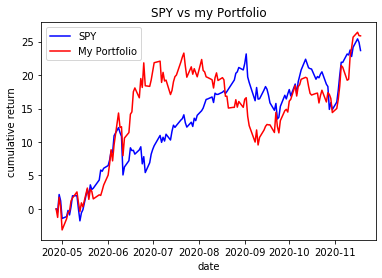

In [85]:
plt.plot(spy.index, spy.kum_ret, "blue", label = "SPY")
plt.plot(spy.index, spy.port_kum_rets, "red", label = "My Portfolio")
plt.legend()
plt.xlabel("date")
plt.ylabel("cumulative return")
plt.title("SPY vs my Portfolio")